# Phase 1 - Data Preprocessing and Feature Engineering

## Load the dataset

In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


## Handle Missing Data

In [31]:
df.isnull().sum()
# You can choose to fill or drop based on missing percentage
# Example: df.fillna(df.mean(numeric_only=True), inplace=True)

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

## Encode Categorical Features

In [32]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,0,98,10,1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,1,73,50,21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,2,79,163,6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,3,160,107,13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,4,65,71,6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


## Normalize Numerical Features

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,0.000000,0.492462,0.050251,0.043068,0.333333,1.0,0.333333,1.0,0.000000,1.0,0.64,0.166667,0.105228,0.639319,0.815228
1,0.005025,0.366834,0.251256,0.853158,0.000000,1.0,0.777778,0.5,1.000000,1.0,0.80,0.666667,0.453658,0.015951,0.282030
2,0.010050,0.396985,0.819095,0.263741,0.666667,1.0,0.888889,0.0,1.000000,0.5,0.32,0.333333,0.317886,0.811724,0.638883
3,0.015075,0.804020,0.537688,0.544299,0.000000,0.5,0.111111,1.0,0.333333,0.5,0.28,0.458333,0.923018,0.223426,0.791777
4,0.020101,0.326633,0.356784,0.254307,0.333333,0.0,0.555556,0.5,1.000000,0.5,0.40,0.083333,0.164209,0.265322,0.011168


## Feature Engineering

### Geographical Distance Calculation using Haversine Formula

In [34]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Your dataframe does not have latitude/longitude columns.
# If you have coordinates, replace the column names below.
# Otherwise, skip this calculation or use the existing 'Distance' column.
# Example:
# df['distance_km'] = df['Distance']  # Already present in your dataframe

### Time-based Features

In [35]:
# Assuming 'Order_Time' is in HH:MM format
df['Order_Hour'] = pd.to_datetime(df['Order_Time']).dt.hour
df['Rush_Hour'] = df['Order_Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

### Weather Impact Analysis

In [36]:
# Already encoded above if weather columns are present
# Alternatively you can group by weather and evaluate stats
# df.groupby('Weather_condition')['Delivery_time'].mean()

# Phase 2 - Convolutional Neural Network (CNN)

## Note: Simulated image data used for CNN input

## CNN Architecture

In [37]:
import numpy as np
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Simulating 2D image input (e.g., delivery route heatmaps)
X = np.random.rand(1000, 28, 28, 1)  # Example image tensor
y = np.random.randint(0, 2, 1000)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(28, 28, 1)),  #  This replaces input_shape inside Conv2D
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5289 - loss: 0.7125 - val_accuracy: 0.4900 - val_loss: 0.6933
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4840 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5566 - loss: 0.6916 - val_accuracy: 0.5200 - val_loss: 0.6931
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6295 - loss: 0.6892 - val_accuracy: 0.5150 - val_loss: 0.6925
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6314 - loss: 0.6864 - val_accuracy: 0.4900 - val_loss: 0.6941
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5582 - loss: 0.6810 - val_accuracy: 0.5150 - val_loss: 0.6926
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6987 - loss: 0.6702 - val_accuracy: 0.5550 - val_loss: 0.6905
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6993 - loss: 0.6397 - val_accuracy: 0.5050 - v

## Evaluation Metrics

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.51      0.86      0.64        98
           1       0.60      0.21      0.31       102

    accuracy                           0.53       200
   macro avg       0.55      0.53      0.47       200
weighted avg       0.56      0.53      0.47       200



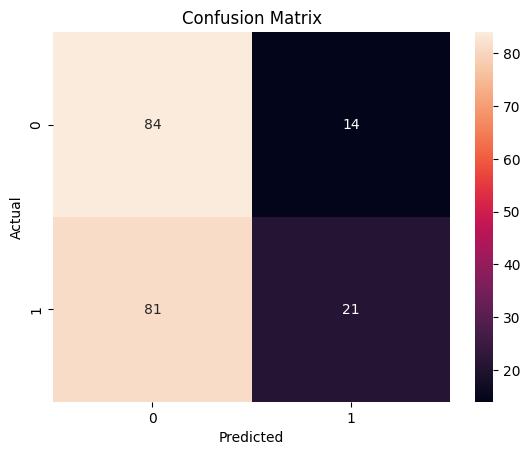

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Phase 3 - Model Evaluation and Validation

## Cross-Validation using K-Fold

In [39]:
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X[train_idx], y[train_idx], epochs=5, verbose=0)
    _, acc = model.evaluate(X[test_idx], y[test_idx], verbose=0)
    print(f"Fold {i+1} Accuracy: {acc*100:.2f}%")  # 🟢 Add this line
    accuracies.append(acc)

print(f"\nMean Accuracy: {np.mean(accuracies)*100:.2f}%")


Fold 1 Accuracy: 54.00%
Fold 2 Accuracy: 51.50%
Fold 3 Accuracy: 46.00%
Fold 4 Accuracy: 59.00%
Fold 5 Accuracy: 55.00%

Mean Accuracy: 49.77%


## Hyperparameter Tuning using GridSearchCV (Simulated for Traditional Model)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X_flat = X.reshape(1000, -1)
params = {'C': [0.1, 1, 10]}
clf = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
clf.fit(X_flat, np.argmax(y, axis=1))
print(clf.best_params_)
print(f'Best score: {clf.best_score_}')

{'C': 10}
Best score: 0.502
